## Description

For this project, I will examine how **unemployment rates** in Ann Arbor, Michigan compare with those across the entire United States.

Data for this project come from the US Bureau of Labor Statistics. Specifically, monthly unemployment rates from 1990 to 2021 were obtained for each region:

- Unemployment rates for Ann Arbor can be found [here](https://www.bls.gov/regions/midwest/mi_annarbor_msa.htm)
- Unemployment rates for the entire US can be found [here](https://www.bls.gov/eag/eag.us.htm)

## Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

path='/home/shelby/personal/coursera/applied-data-science-python/plotting-python/'

In [28]:
# load data
df_aa = pd.read_excel(io=path+'SeriesReport-20211221204540_e2f056.xls', 
                      skiprows=10, index_col=0)

df_us = pd.read_excel(io=path+'SeriesReport-20211221203317_c11e17.xls', 
                      skiprows=11, index_col=0)

# preview of raw data
print(df_aa.head())
print(df_us.head())

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Year                                                            
1990  5.4  4.7  4.4  4.3  4.5  4.6  6.5  5.3  4.1  5.1  4.4  4.6
1991  5.4  6.0  5.3  6.2  5.6  5.8  6.9  6.4  5.7  5.3  4.8  5.5
1992  5.4  6.2  6.0  4.5  4.8  5.1  5.4  5.3  4.7  4.2  4.1  4.1
1993  4.6  4.3  4.7  3.8  4.3  4.7  5.1  4.1  4.0  3.8  3.6  3.6
1994  4.3  4.0  3.9  3.5  3.5  3.6  3.8  3.4  3.0  2.7  2.3  2.2
      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Year                                                            
1990  5.4  5.3  5.2  5.4  5.4  5.2  5.5  5.7  5.9  5.9  6.2  6.3
1991  6.4  6.6  6.8  6.7  6.9  6.9  6.8  6.9  6.9  7.0  7.0  7.3
1992  7.3  7.4  7.4  7.4  7.6  7.8  7.7  7.6  7.6  7.3  7.4  7.4
1993  7.3  7.1  7.0  7.1  7.1  7.0  6.9  6.8  6.7  6.8  6.6  6.5
1994  6.6  6.6  6.5  6.4  6.1  6.1  6.1  6.0  5.9  5.8  5.6  5.5


In [29]:
# get year summaries for each dataframe (mean, std, SE)
def func_summary(x):
    n = len(x)
    m = np.nanmean(x)
    s = np.nanstd(x)
    se = s/math.sqrt(n)
    err = 1.96 * se
    return [m,s,se,err]

df_aa_summary = df_aa.apply(func_summary, axis=1, result_type='expand')
df_us_summary = df_us.apply(func_summary, axis=1, result_type='expand')

# set column names
cnames = ['mean', 'std', 'se', 'err']

# modify column names to include region
df_aa_summary.columns = [str(x)+'_aa' for x in cnames]
df_us_summary.columns = [str(x)+'_us' for x in cnames]

# preview of summarized data
print(df_aa_summary.head())
print(df_us_summary.head())

       mean_aa    std_aa     se_aa    err_aa
Year                                        
1990  4.825000  0.633936  0.183002  0.358683
1991  5.741667  0.542307  0.156551  0.306839
1992  4.983333  0.676798  0.195375  0.382935
1993  4.216667  0.463381  0.133767  0.262183
1994  3.350000  0.639661  0.184654  0.361922
       mean_us    std_us     se_us    err_us
Year                                        
1990  5.616667  0.362476  0.104638  0.205090
1991  6.850000  0.214087  0.061802  0.121131
1992  7.491667  0.155233  0.044812  0.087831
1993  6.908333  0.225308  0.065041  0.127480
1994  6.100000  0.353553  0.102062  0.200042


In [30]:
# join summarized data for ann arbor & us
df_summary = df_aa_summary.merge(df_us_summary, left_index=True, right_index=True)

# preview of joined data
print(df_summary.head())

       mean_aa    std_aa     se_aa    err_aa   mean_us    std_us     se_us  \
Year                                                                         
1990  4.825000  0.633936  0.183002  0.358683  5.616667  0.362476  0.104638   
1991  5.741667  0.542307  0.156551  0.306839  6.850000  0.214087  0.061802   
1992  4.983333  0.676798  0.195375  0.382935  7.491667  0.155233  0.044812   
1993  4.216667  0.463381  0.133767  0.262183  6.908333  0.225308  0.065041   
1994  3.350000  0.639661  0.184654  0.361922  6.100000  0.353553  0.102062   

        err_us  
Year            
1990  0.205090  
1991  0.121131  
1992  0.087831  
1993  0.127480  
1994  0.200042  


## Visualization of Results

<IPython.core.display.Javascript object>


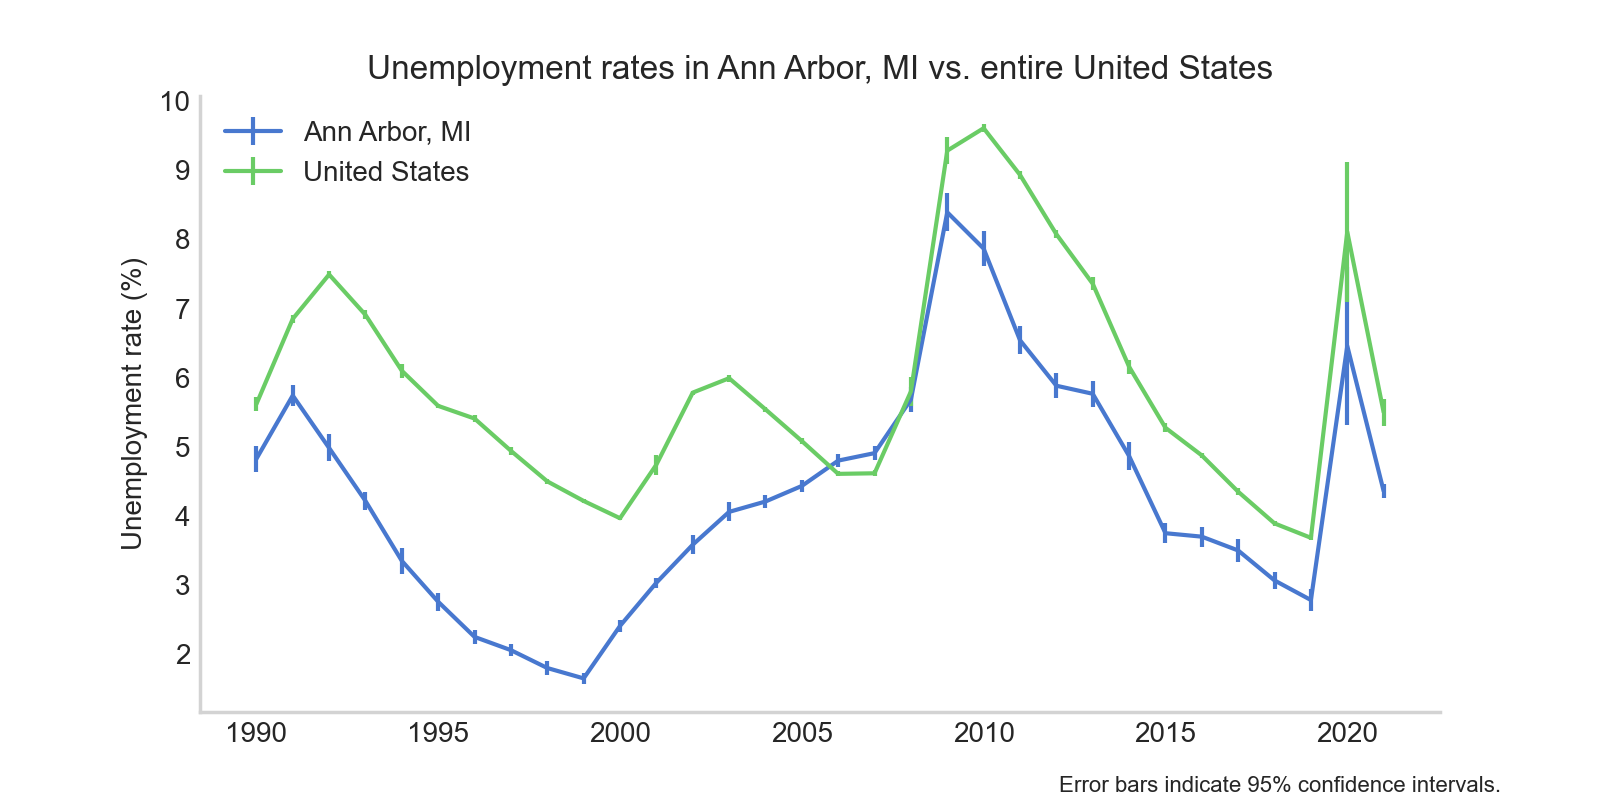

In [63]:
# initialize figure
plt.style.use('seaborn-muted')
fig, ax = plt.subplots(figsize = (8, 4))

# aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
#ax.tick_params(bottom=False, left=False)

# create line plot
ax.errorbar(df_summary.index, df_summary['mean_aa'], df_summary['se_aa'], label='Ann Arbor, MI')
ax.errorbar(df_summary.index, df_summary['mean_us'], df_summary['se_us'], label='United States')
ax.legend(loc='upper left')

# set axis labels, title and caption
title = plt.title('Unemployment rates in Ann Arbor, MI vs. entire United States')
ylab = plt.ylabel('Unemployment rate (%)')
caption = plt.figtext(0.8, 0.01, 'Error bars indicate 95% confidence intervals.', 
            wrap=True, horizontalalignment='center', fontsize=8)

## Discussion

The visualization was concerned with answering the question of how unemployment rates over time in Ann Arbor, Michigan compared with those across the entire United States. Data from the United States Bureau for Labor Statistics was obtained and unemployment rates for each region were averaged over all months for each calendar year. 95% confidence intervals for the mean unemployment rate in each year were computed. The mean unemployment rate for each year, along with the 95% confidence intervals as error bars, were plotted to identify trends in unemployment rates over time.

The plot indicates that unemployment rates were consistently lower than the national average rates, with the exception of the years around 2006-2009 (likely due to the financial crisis of 2008). The gap also narrowed in 2020, likely due to the COVID-19 global pandemic. Although unemployment rates were lower in Ann Arbor than across the entire US, they followed similar trends over time, decreasing first from 1990 to 2000, increasing from 2000 to 2010 (with a notable exception around the 2008 financial crisis), then decreasing again until 2020.